<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [7]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [8]:
X.head() #To check the different columns ie independent variables

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y.head() #To check the dependent variable

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
X.isnull().sum() #To check whether there are null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
y.isnull().sum() #To check whether there are null values

MEDV    0
dtype: int64

In [12]:
X.dtypes #To check the type 

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [13]:
y.dtypes #To check the type 

MEDV    float64
dtype: object

In [14]:
X.index #To check the range of the dataset

RangeIndex(start=0, stop=506, step=1)

In [15]:
y.index #To check the range of the dataset

RangeIndex(start=0, stop=506, step=1)

In [16]:
X.shape #To confirm the range and shape

(506, 13)

In [17]:
y.shape #To confirm the range and shape

(506, 1)

In [18]:
X.describe() #To look at the summarized dataset and have a quick understanding. B's output is interesting 
#so the next step is to plot a boxplot.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [19]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


<AxesSubplot:>

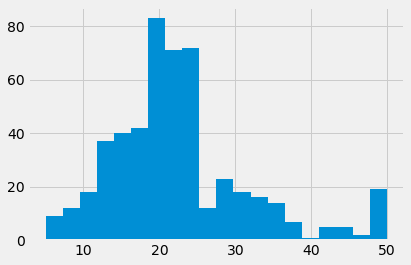

In [178]:
y.hist(bins=20) #It shows that the median value of homes are normally distributed, except for 20+ units in the high
#value range of USD50,000.

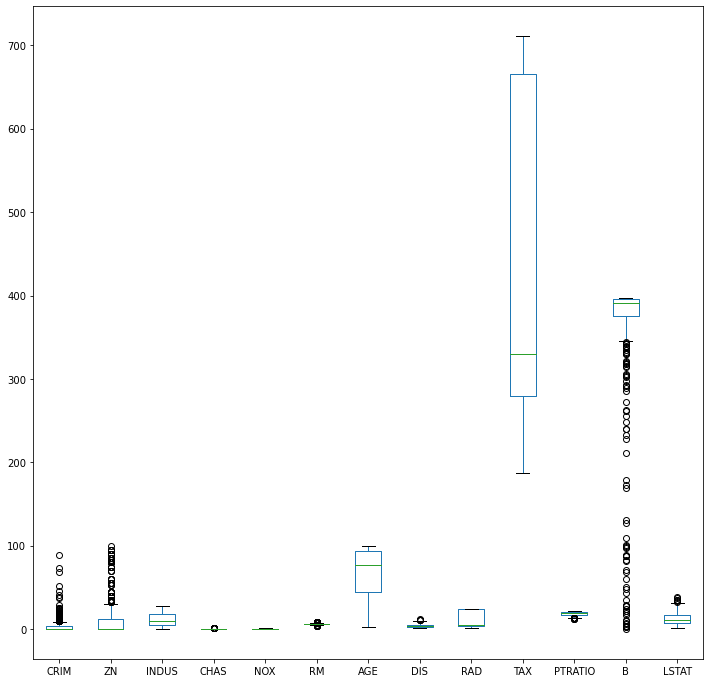

In [20]:
X.plot(kind='box', figsize=(12,12)); #It shows that B is negatively skewed, where as CRIM and ZN is positively skewed.

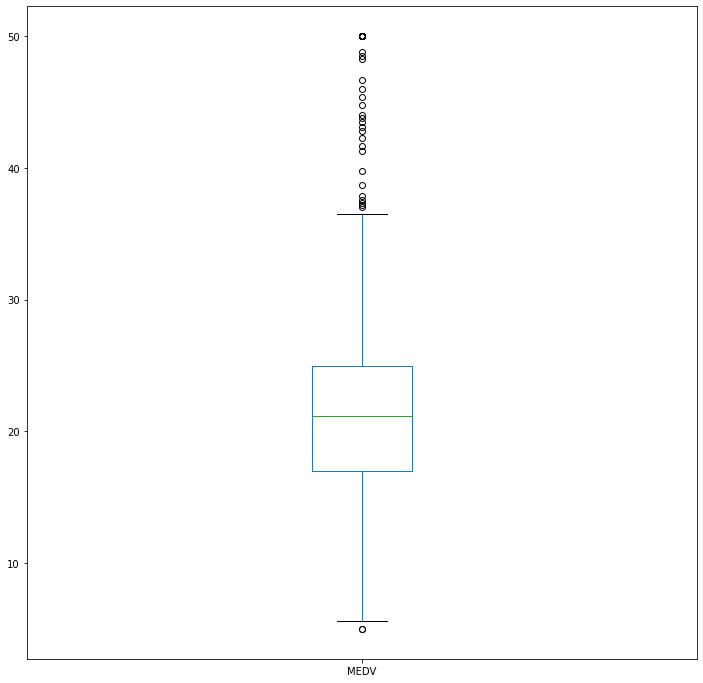

In [21]:
y.plot(kind='box', figsize=(12,12));

In [138]:
X.nunique() #To look for unique value counts

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [139]:
y.nunique() #To look for unique value counts

229

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [24]:
boston = pd.concat([X, y], axis=1) #Need to join the dataframes

In [25]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
feature_cols = ['CRIM', 'PTRATIO', 'B', 'LSTAT']
Z = X[feature_cols]
y = boston.MEDV

In [28]:
print((type(Z)))
print((type(Z.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [29]:
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [30]:
print((Z.shape))

(506, 4)


In [31]:
print((y.shape))

(506,)


In [32]:
from sklearn.linear_model import LinearRegression #Importing the class to use

In [33]:
lr = LinearRegression() #Making an instance of a LinearRegression object
type(lr)

sklearn.linear_model._base.LinearRegression

In [34]:
lr

LinearRegression()

In [35]:
lr.fit(Z, y) #Fitting the model

LinearRegression()

In [80]:
# Predict the response values for the observations in Z
lr.predict(Z)

array([32.41920822, 26.31757496, 30.32495878, 30.18035489, 28.30783132,
       28.38656437, 26.64613616, 21.35173884, 12.78624496, 22.90881886,
       20.29956867, 25.99079318, 24.02847909, 23.39648184, 21.71933603,
       23.22331036, 24.65832597, 18.27829949, 20.05426389, 20.97799726,
       13.20400483, 18.97425643, 15.13822321, 14.21176427, 17.03730292,
       16.33618024, 18.11099411, 15.74492213, 19.76066879, 20.35984469,
       11.8623711 , 19.49934628,  7.07831835, 15.20677494, 12.98258059,
       24.31222562, 22.83335914, 25.02996396, 23.93565762, 29.54872259,
       31.39464329, 29.52848973, 28.7511091 , 27.53020878, 25.83618925,
       25.35915729, 22.25068789, 18.55738548,  9.10681772, 20.63310108,
       24.03669179, 27.19922205, 30.49030519, 28.00528859, 18.13068413,
       29.61520373, 29.54017363, 33.43374538, 25.93551657, 24.11080186,
       20.99939324, 19.88134108, 26.0751066 , 23.88190448, 26.25378574,
       31.76120115, 27.36690767, 25.89305439, 21.9596558 , 25.35

In [81]:
y_pred = lr.predict(Z)

In [82]:
from sklearn import metrics

print(metrics.mean_squared_error(y, y_pred))
#Evaluated the model by using Mean squared error

32.930859133252085


In [83]:
print(lr.intercept_)
print(lr.coef_)

51.27015816832386
[-0.01044331 -1.12782483  0.00587955 -0.78890672]


Interpreting the intercept:

It is the value of  𝑦  when all independent variables are 0.
Here, it is the estimated median value of owner-occupied homes in $1000's is 51.27015816832386 when the per capita crime rate by town, pupil-teacher ratio by town, proportion of blacks by town and lower status of the population is 0.

Interpreting the features' coefficients:

CRIM - An increase of 1 per capita crime rate is associated with decreasing the median value of owner occupied homes in $1000's by  0.01044331.

PTRATIO - An increase of 1 pupil-teacher ratio by town is associated with decreasing the median value of owner occupied homes in $1000's by  1.12782483.

This got me interested to see the correlation between CRIM and PTRATIO, whether there is a strong correlation between increasing number of pupil per teacher which may result in substandard education which in turn impacts crime.

In [37]:
import seaborn as sns #For the heatmap
plt.style.use('fivethirtyeight') 

In [38]:
Z.head()

,CRIM,PTRATIO,B,LSTAT
0,0.00632,15.3,396.90,4.98
1,0.02731,17.8,396.90,9.14
2,0.02729,17.8,392.83,4.03
3,0.03237,18.7,394.63,2.94
4,0.06905,18.7,396.90,5.33


In [39]:
Z_new = Z - Z.mean() #Demeaning to calculate variance-covariance matrix
Z_new.T.dot(Z_new)/(len(Z)-1)

,CRIM,PTRATIO,B,LSTAT
CRIM,73.986578,5.399331,-302.381816,27.986168
PTRATIO,5.399331,4.686989,-35.059527,5.782729
B,-302.381816,-35.059527,8334.752263,-238.667516
LSTAT,27.986168,5.782729,-238.667516,50.994760


In [40]:
Z.cov()

,CRIM,PTRATIO,B,LSTAT
CRIM,73.986578,5.399331,-302.381816,27.986168
PTRATIO,5.399331,4.686989,-35.059527,5.782729
B,-302.381816,-35.059527,8334.752263,-238.667516
LSTAT,27.986168,5.782729,-238.667516,50.994760


In [41]:
Z.corr()

,CRIM,PTRATIO,B,LSTAT
CRIM,1.000000,0.289946,-0.385064,0.455621
PTRATIO,0.289946,1.000000,-0.177383,0.374044
B,-0.385064,-0.177383,1.000000,-0.366087
LSTAT,0.455621,0.374044,-0.366087,1.000000


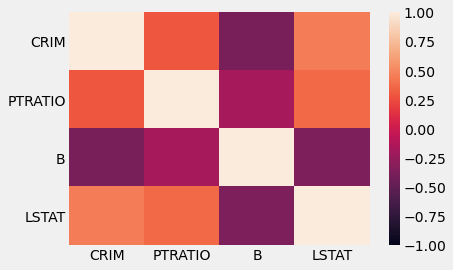

In [42]:
sns.heatmap(Z.corr(), vmin=-1, vmax=1);

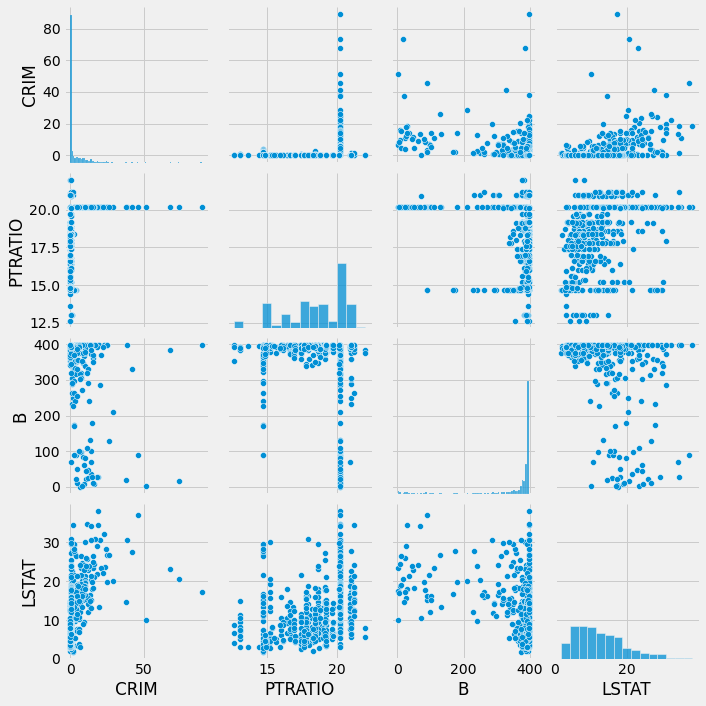

In [43]:
sns.pairplot(Z); #Scatter to visualize it better

It seems there is only a weak correlation between crime and pupil-teacher ratio, compared to crime and lower status of population.

In [44]:
Z_new = pd.concat([Z, y], axis=1)

In [45]:
Z_new.head()

,CRIM,PTRATIO,B,LSTAT,MEDV
0,0.00632,15.3,396.90,4.98,24.0
1,0.02731,17.8,396.90,9.14,21.6
2,0.02729,17.8,392.83,4.03,34.7
3,0.03237,18.7,394.63,2.94,33.4
4,0.06905,18.7,396.90,5.33,36.2


In [46]:
Z_new.corr()

,CRIM,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.289946,-0.385064,0.455621,-0.388305
PTRATIO,0.289946,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,-0.177383,1.000000,-0.366087,0.333461
LSTAT,0.455621,0.374044,-0.366087,1.000000,-0.737663
MEDV,-0.388305,-0.507787,0.333461,-0.737663,1.000000


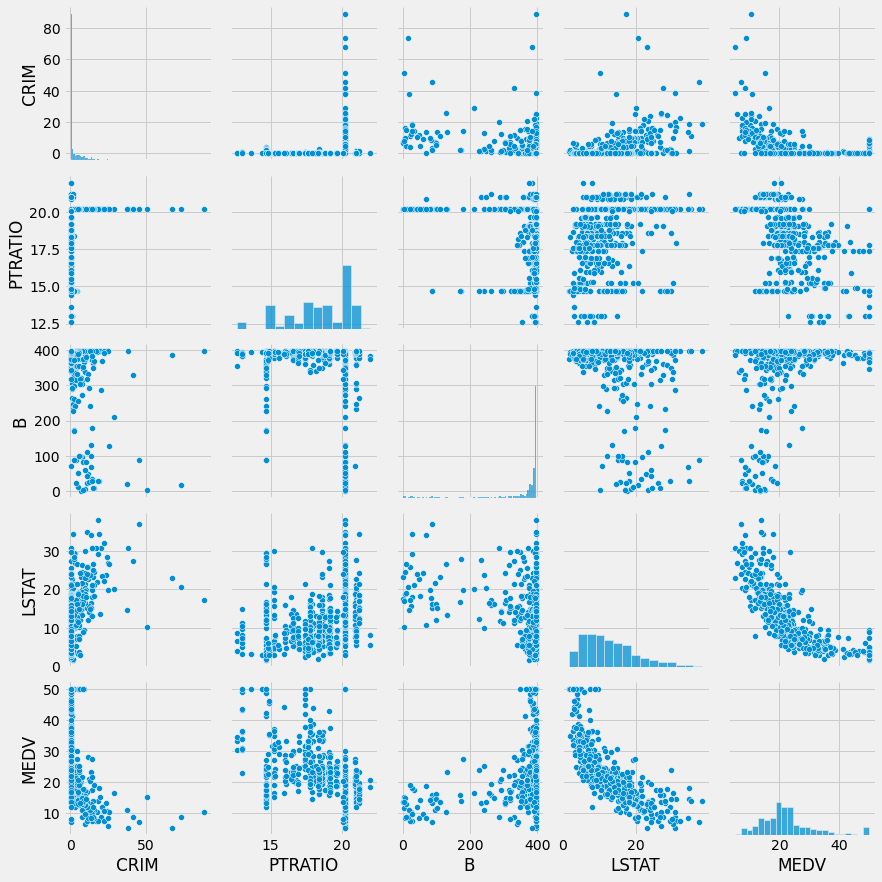

In [47]:
sns.pairplot(Z_new); #Scatter to visualize it better

Here is shows that there is a strong negative correlation relationship between lower status of population (LSTAT) and the median value of owner-occupied homes (MEDV).

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [50]:
Z.head()

,CRIM,PTRATIO,B,LSTAT
0,0.00632,15.3,396.90,4.98
1,0.02731,17.8,396.90,9.14
2,0.02729,17.8,392.83,4.03
3,0.03237,18.7,394.63,2.94
4,0.06905,18.7,396.90,5.33


In [141]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 70/30 train/test split

In [144]:
from sklearn.model_selection import train_test_split

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.30) #Test size refered to 
#https://machinelearningmastery.com/ for the train/test size

In [145]:
# Before splitting
print(Z.shape)

# After splitting
print(Z_train.shape)
print(Z_test.shape)

(506, 4)
(354, 4)
(152, 4)


In [146]:
# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(506,)
(354,)
(152,)


In [182]:
#Running the code WITHOUT a random_state parameter to confirm the different results (1/2).
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.30) 
print(Z_train.head(1))

       CRIM  PTRATIO      B  LSTAT
179  0.0578     17.8  396.9   5.04


In [183]:
#Running the code WITHOUT a random_state parameter to confirm the different results (2/2).
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.30) 
print(Z_train.head(1))

        CRIM  PTRATIO       B  LSTAT
471  4.03841     20.2  395.33  12.87


In [148]:
#Running the code WITH a random_state parameter to confirm the same results (1/2)
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.30, random_state=1)
print(Z_train.head(1))
print(Z_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

       CRIM  PTRATIO      B  LSTAT
13  0.62976     21.0  396.9   8.26
        CRIM  PTRATIO      B  LSTAT
307  0.04932     18.4  396.9   7.53
13    20.4
Name: MEDV, dtype: float64
307    28.2
Name: MEDV, dtype: float64


In [185]:
#Running the code WITH a random_state parameter to confirm the same results (1/2)
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.30, random_state=1)
print(Z_train.head(1))
print(Z_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

       CRIM  PTRATIO      B  LSTAT
13  0.62976     21.0  396.9   8.26
        CRIM  PTRATIO      B  LSTAT
307  0.04932     18.4  396.9   7.53
13    20.4
Name: MEDV, dtype: float64
307    28.2
Name: MEDV, dtype: float64


In [186]:
# Import the class.
from sklearn.linear_model import LinearRegression

# Instantiate the model.
lr = LinearRegression()

# Train the model on the training data set.
lr.fit(Z_train, y_train)

# Predict the response values for the observations in Z ("test the model").
lr.predict(Z_test)

array([26.76256196, 27.91498562, 18.60708306, 25.76840235, 22.6535081 ,
       20.85568463, 28.06169467, 19.55549911, 20.95909834, 26.41647504,
       24.59754861, 29.85607902, 22.71295153, 27.21081246, 23.52966494,
       20.93864863, 12.51282335, 30.03443496, 30.90758276, 13.86075238,
       23.69980964, 22.78908106, 25.40798684, 26.52567378, 31.50489044,
       10.02679612, 13.3496679 , 23.95779068, 32.88985255, 14.50788685,
       28.32801173, 17.52905279, 34.40081873, 17.86995618, 27.08726446,
       21.20812901, 16.5118429 , 28.12763268, 12.46810764, 19.01426284,
       28.4662791 , 25.34428229, 27.81184132, 11.57863321, 16.60447577,
       11.48236711, 35.13666956, 17.97704003, 28.38132493, 20.14671995,
       21.49273367, 25.79497337, 28.20763113, 27.6430824 ,  7.45774021,
       25.94508328,  7.21259836, 27.95749857, 18.34398911, 30.54493958,
       18.65062109, 27.40246125, 15.20774962, 15.57166916,  9.35011861,
       29.34412526, 31.71724232, 28.62600189, 27.19778827, 27.66

In [150]:
y_pred = lr.predict(Z_test) # Prediction on test data (not used for training)

In [151]:
from sklearn import metrics

In [152]:
print(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(Z_train)))) # Training RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Test RMSE - out of sample error

5.643198366259802
5.97860004093822


### 80/20 train/test split

In [190]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.20, random_state=1)
print(Z_train.head(1))
print(Z_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

      CRIM  PTRATIO       B  LSTAT
42  0.1415     17.9  383.37   5.81
        CRIM  PTRATIO      B  LSTAT
307  0.04932     18.4  396.9   7.53
42    25.3
Name: MEDV, dtype: float64
307    28.2
Name: MEDV, dtype: float64


In [191]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Z_train, y_train)
lr.predict(Z_test)

array([26.80742233, 28.00463426, 18.81670476, 25.78959963, 22.54658346,
       20.76184744, 28.02337433, 19.48063704, 21.25213591, 26.51278256,
       24.42213928, 29.91245541, 22.86625536, 27.42891019, 23.62174786,
       20.68225943, 12.33198931, 30.09228278, 31.17582962, 14.35406486,
       23.78936821, 23.08963449, 25.46779595, 26.47443926, 31.65460558,
        9.78716718, 13.33725051, 24.01367032, 33.24842768, 14.44575718,
       28.34872137, 17.66169328, 34.61280462, 17.71676508, 27.2376529 ,
       21.27435158, 16.43554487, 28.12679579, 12.18155089, 18.92820456,
       28.59584848, 25.26909093, 27.90706707, 11.57524726, 16.46318045,
       11.31018356, 35.30052744, 17.75572394, 28.59465884, 20.01774142,
       21.38353135, 25.98938297, 28.20561752, 27.89457972,  7.6551081 ,
       25.89987861,  7.21734331, 27.96851345, 18.30229229, 30.59778762,
       18.44470035, 27.42798216, 15.14308008, 15.40897029,  9.64069309,
       29.39464038, 31.74822366, 28.83586184, 27.4231708 , 27.94

In [192]:
y_pred = lr.predict(Z_test)

In [193]:
print(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(Z_train)))) # Training RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Test RMSE - out of sample error

5.526719035883892
6.532262739851341


### 90/10 train/test split

In [194]:
from sklearn.model_selection import train_test_split

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.10, random_state=1)

In [195]:
# Before splitting
print(Z.shape)

# After splitting
print(Z_train.shape)
print(Z_test.shape)

(506, 4)
(455, 4)
(51, 4)


In [196]:
# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(506,)
(455,)
(51,)


In [197]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.10, random_state=1) 
print(Z_train.head(1))
print(Z_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

       CRIM  PTRATIO       B  LSTAT
242  0.1029     16.6  372.75  11.22
        CRIM  PTRATIO      B  LSTAT
307  0.04932     18.4  396.9   7.53
242    22.2
Name: MEDV, dtype: float64
307    28.2
Name: MEDV, dtype: float64


In [198]:
lr.fit(Z_train, y_train)
lr.predict(Z_test)

array([26.90647442, 28.05743856, 18.7058721 , 25.91154724, 22.70569628,
       20.97657178, 28.2177782 , 19.64480907, 21.06162376, 26.54929922,
       24.62880867, 29.997303  , 22.82805632, 27.337608  , 23.65552672,
       20.76674757, 12.27015174, 30.15862236, 31.03483112, 13.86927751,
       23.82664878, 22.61374033, 25.53868047, 26.67263885, 31.64929138,
        9.40381877, 13.27893387, 24.08262878, 32.99547804, 14.4524087 ,
       28.45048389, 17.6305291 , 34.53929993, 17.78367692, 27.19156194,
       21.33142852, 16.42273595, 28.27917471, 12.12230241, 19.02278179,
       28.58243661, 25.49001597, 27.94025379, 11.45196359, 16.49789825,
       10.9886385 , 35.24036529, 17.82990684, 28.28462611, 19.95174071,
       21.51437207])

In [199]:
y_pred = lr.predict(Z_test)

In [200]:
print(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(Z_train)))) # Training RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Test RMSE - out of sample error

5.710998673569609
5.9957880678294355


Findings: The 70/30 train/test split produced a lower RMSE compared to 80/20 and 90/10 train/test split, which means the 70/30 train/test split indicates a better fit.

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [123]:
from sklearn import model_selection

In [130]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [131]:
mse_values = []
rmse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(Z, y):
    lr = LinearRegression().fit(Z.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(Z.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(Z.iloc[test_index]))))
    scores.append(lr.score(Z, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))  

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 32.009579564335525
RMSE: 5.6577009079957135
R2: 0.6090827644826089

Model 2
MSE: 24.84728232050424
RMSE: 4.98470483785191
R2: 0.6088660829747257

Model 3
MSE: 34.03757901068661
RMSE: 5.834173378524726
R2: 0.6085563196197121

Model 4
MSE: 29.72507927245842
RMSE: 5.452071099358337
R2: 0.6095702903988278

Model 5
MSE: 48.537777827491155
RMSE: 6.9669059005767515
R2: 0.6075001501955122

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 33.83145959909519
Mean of RMSE for all folds: 5.779111224861487
Mean of R2 for all folds: 0.6087151215342773


In [134]:
kf = model_selection.KFold(n_splits=7, shuffle=True)

In [135]:
mse_values = []
rmse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(Z, y):
    lr = LinearRegression().fit(Z.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(Z.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(Z.iloc[test_index]))))
    scores.append(lr.score(Z, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))   

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 31.165571276616802
RMSE: 5.582613301726782
R2: 0.6095627533756828

Model 2
MSE: 25.910341139533426
RMSE: 5.090220146470428
R2: 0.6095578911536496

Model 3
MSE: 36.605194903280015
RMSE: 6.050222715179997
R2: 0.6082152799293623

Model 4
MSE: 33.644533662353275
RMSE: 5.800390819794238
R2: 0.609553718091802

Model 5
MSE: 35.73675133689466
RMSE: 5.978022360019629
R2: 0.6095912439665622

Model 6
MSE: 42.63230515320969
RMSE: 6.5293418621795025
R2: 0.609310003573272

Model 7
MSE: 30.678498759883112
RMSE: 5.538817451395479
R2: 0.6083474177983521

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 33.76759946168157
Mean of RMSE for all folds: 5.795661236680865
Mean of R2 for all folds: 0.6091626154126689


In [132]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

In [133]:
mse_values = []
rmse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(Z, y):
    lr = LinearRegression().fit(Z.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(Z.iloc[test_index])))
    rmse_values.append(np.sqrt(metrics.mean_squared_error(y.iloc[test_index], lr.predict(Z.iloc[test_index]))))
    scores.append(lr.score(Z, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('RMSE: {}'.format(rmse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of RMSE for all folds: {}'.format(np.mean(rmse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))    

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 43.38229807443703
RMSE: 6.586523975090126
R2: 0.6093573936588874

Model 2
MSE: 33.07305445057578
RMSE: 5.750917705077667
R2: 0.6092611248204371

Model 3
MSE: 22.97252153214556
RMSE: 4.792965838825221
R2: 0.6098597030573552

Model 4
MSE: 41.92271689403791
RMSE: 6.474775431938772
R2: 0.6096035853693775

Model 5
MSE: 29.82539280571859
RMSE: 5.461262931384882
R2: 0.6097135209210874

Model 6
MSE: 32.395630973728764
RMSE: 5.691715995526197
R2: 0.6095480378471136

Model 7
MSE: 48.85317210830805
RMSE: 6.989504425086807
R2: 0.6094772871466565

Model 8
MSE: 27.57482607227338
RMSE: 5.251173780429798
R2: 0.6086717321553705

Model 9
MSE: 21.650141306588672
RMSE: 4.652971234231808
R2: 0.6094900413267924

Model 10
MSE: 35.074253907403865
RMSE: 5.9223520587182135
R2: 0.6093791186046518

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 33.672400812521765
Mean of RMSE for all folds: 5.757416337630948
Mean of R2 for all folds: 0.6094361544

Findings: k-fold of 10 produces lower mean of RMSE compared to k-fold of 5, which means better accuracy.

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [205]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))